<h1 style="text-align: center;"> P452 - Computational Physics</h1>
<h2 style="text-align: center;"> EndTerm </h2>
<h3 style="text-align: center;"> Jyotirmaya Shivottam | 1711069</h3>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go

from _1711069_endterms_utils import (
    # Q1 -- Random Walk
    random_walk, k_rand_walker, rw_plot,
    # Q2 -- Legendre PolyFit
    func_to_fit, legendre, polyfit, inverse, chi_sq_by_v,
    # Q3 -- 1D Heat Equation - Implemented here itself
    # Q4 -- Gaussian Quadrature - Implemented here itself
)

#### Q1 -- 2D Random Walk

In [2]:
# One 200-step 2D random walk starting at (0, 0) with (a, m) = (572, 16381)
path = random_walk(ndim=2, steps=200, movement="grid", sampling="uniform", a=572, m=16381)
rw_plot(path)

In [21]:
# Simulating 500 200-step 2D random walks with possible movement choices limited to [-1, 1] in each direction ('grid' movement) with (a, m) = (572, 16381)
paths, fig = k_rand_walker(k=500, ndim=2, steps=200, movement="grid", sampling="uniform", a=572, m=16381)
fig

In [4]:
# Calculating RMS(N = 200) for 500 walks
rms = 0

for path in paths:
    rms += path[:, -1][-1] ** 2

rms /= len(paths)
print(f"RMS(N = 200) for 500 simulated 2D random walks = {np.sqrt(rms)} and sqrt(200) = {np.sqrt(200)}.")

RMS(N = 200) for 500 simulated 2D random walks = 15.150181517064407 and sqrt(200) = 14.142135623730951.


So, $R_{\text{rms}}(N = 200) \approx \sqrt{N}$. Note that, with a better set of $(a, m)$ values, the approximation becomes even better. For instance, with $(a, m) = (1664525, 2^{32})$ (as recommended by Numerical Recipes), we get:

In [5]:
# Simulating 500 200-step 2D random walks with possible movement choices limited to [-1, 1] in each direction ('grid' movement) with (a, m) = (572, 16381)
paths, fig = k_rand_walker(k=500, ndim=2, steps=200, movement="grid", sampling="uniform", a=1664525, m=2**32)
# fig

In [6]:
# Calculating RMS(N = 200) for 500 walks
rms = 0

for path in paths:
    rms += path[:, -1][-1] ** 2

rms /= len(paths)
print(f"RMS(N = 200) for 500 simulated 2D random walks = {np.sqrt(rms)} and sqrt(200) = {np.sqrt(200)}.")

RMS(N = 200) for 500 simulated 2D random walks = 14.20197169409938 and sqrt(200) = 14.142135623730951.


Clearly, the approximation is dependent on the random sampling.

#### Q2 -- Legendre PolyFit

In [7]:
dat = np.genfromtxt("esem4fit.txt")
x, y = dat[:, 0], dat[:, 1]

# Sigma values for y - perhaps as least count
yerr = np.tile([0.001], x.shape[0])

In [8]:
# Legendre LSq fit - Order = 4
A, (_, (a0, a1, a2, a3, a4), _) = polyfit(x, y, yerr, n=4, basis="legendre")
_4tuple = (a0, a1, a2, a3, a4)
_4std_tuple = np.sqrt(np.diag(inverse(A)[1]))
# Printing coeffs with their respective standard deviation and relative error
print("Coefficient \t Standard Deviation \t Relative Error (in %)")
for coeff, std in zip(_4tuple, _4std_tuple):
    print(f"{coeff:.5} \t {std:.5} \t\t {np.abs(std / coeff) * 100:.5}")

Coefficient 	 Standard Deviation 	 Relative Error (in %)
0.069658 	 0.00019612 		 0.28154
0.003624 	 0.00032686 		 9.0193
-0.012083 	 0.0004181 		 3.4603
0.011426 	 0.00045977 		 4.0238
0.11049 	 0.00051418 		 0.46535


In [9]:
# Legendre LSq fit - Order = 5
A, (_, (a0, a1, a2, a3, a4, a5), _) = polyfit(x, y, yerr, n=5, basis="legendre")
_5tuple = (a0, a1, a2, a3, a4, a5)
_5std_tuple = np.sqrt(np.diag(inverse(A)[1]))
# Printing coeffs with their respective standard deviation and relative error
print("Coefficient \t Standard Deviation \t Relative Error (in %)")
for coeff, std in zip(_5tuple, _5std_tuple):
    print(f"{coeff:.5} \t {std:.5} \t\t {np.abs(std / coeff) * 100:.5}")

Coefficient 	 Standard Deviation 	 Relative Error (in %)
0.069658 	 0.00019612 		 0.28154
0.0043017 	 0.00032686 		 7.5984
-0.012083 	 0.0004181 		 3.4603
0.013084 	 0.00048225 		 3.6858
0.11049 	 0.00051418 		 0.46535
-0.006727 	 0.00055234 		 8.2109


In [10]:
# Legendre LSq fit - Order = 5
A, (_, (a0, a1, a2, a3, a4, a5, a6), _) = polyfit(x, y, yerr, n=6, basis="legendre")
_6tuple = (a0, a1, a2, a3, a4, a5, a6)
_6std_tuple = np.sqrt(np.diag(inverse(A)[1]))
# Printing coeffs with their respective standard deviation and relative error
print("Coefficient \t Standard Deviation \t Relative Error (in %)")
for coeff, std in zip(_6tuple, _6std_tuple):
    print(f"{coeff:.5} \t {std:.5} \t\t {np.abs(std / coeff) * 100:.5}")

Coefficient 	 Standard Deviation 	 Relative Error (in %)
0.070032 	 0.00019612 		 0.28004
0.0043017 	 0.00032686 		 7.5984
-0.010167 	 0.00043163 		 4.2455
0.013084 	 0.00048225 		 3.6858
0.11412 	 0.00053929 		 0.47257
-0.006727 	 0.00055234 		 8.2109
-0.012385 	 0.00059353 		 4.7925


In [11]:
# Chi-Squared / v values for various orders
_4chi, _5chi, _6chi = chi_sq_by_v(x, y, yerr, _4tuple), chi_sq_by_v(x, y, yerr, _5tuple), chi_sq_by_v(x, y, yerr, _6tuple)
_4chi, _5chi, _6chi

(133.5376748040098, 132.92479144643394, 117.38564375605866)

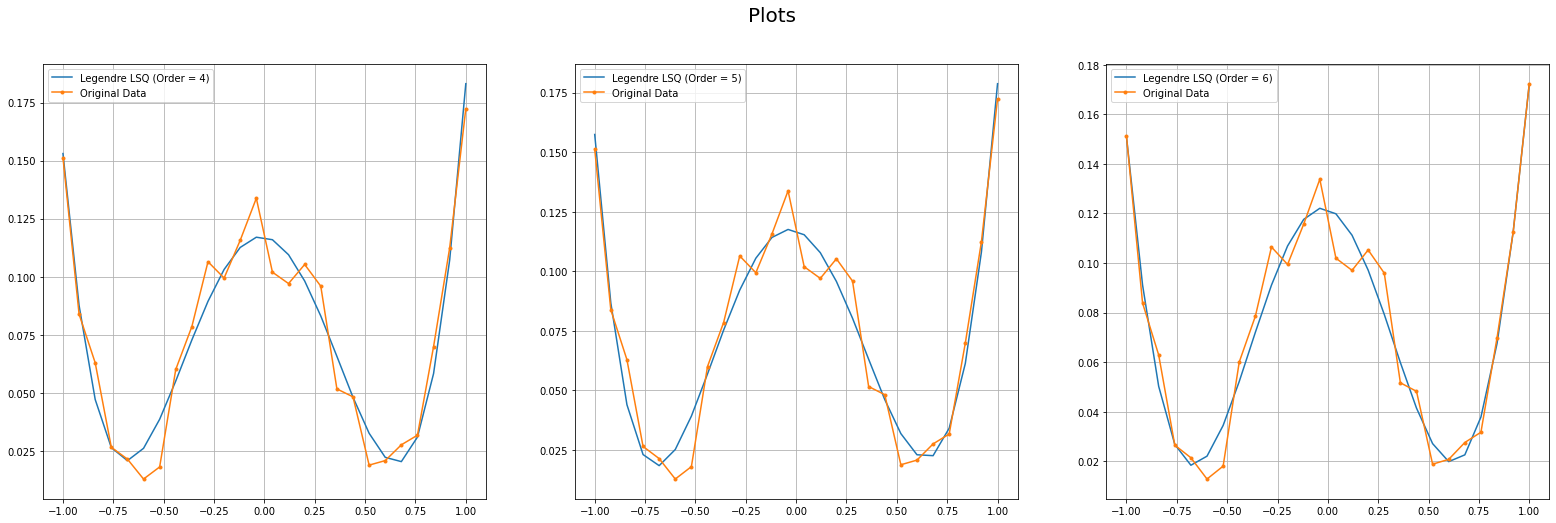

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(27,8))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func_to_fit(x, _4tuple, basis=legendre), label="Legendre LSQ (Order = 4)")
axs[0].plot(x, y, ".-", label="Original Data")
axs[1].plot(x, func_to_fit(x, _5tuple, basis=legendre), label="Legendre LSQ (Order = 5)")
axs[1].plot(x, y, ".-", label="Original Data")
axs[2].plot(x, func_to_fit(x, _6tuple, basis=legendre), label="Legendre LSQ (Order = 6)")
axs[2].plot(x, y, ".-", label="Original Data")

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.show()

Based on the plots and chi-squared values, we can see that, order = 6 LSQ provides the best results.

#### Q3 -- 1D Heat Equation



$$
\begin{align}
u_{xx} &= u_t, \text{where,} \\
u(0, t) &= 0^\circ C = u(2, t) \quad \text{for}\:0 \le t \le 4 \\
u(x, 0) &= 20|\sin(\pi x)|^\circ C \quad \text{for}\:0 \le x \le 2 \\
\end{align}
$$

In [13]:
def pde_explicit(dt:float, dx:float, k:float, u):
    alpha = k * dt / dx ** 2
    NX, NT = u.shape

    for j in range(NT - 1):
        for i in range(1, NX - 1):
            u[i, j+1] = alpha * (u[i + 1, j] + u[i - 1, j]) + (1 - 2 * alpha) * u[i, j]
    return u

In [14]:
# Grid
dx = 0.1
NX = 20
dt = 0.0008 # 0.008
NT = 5000

# PDE system
x_end = 2
x = np.arange(0, x_end, dx)
u = np.zeros((int(x_end / dx), NT))
u[:, 0] = 20 * np.abs(np.sin(np.pi * x))

# Simulating
res = pde_explicit(dt, dx, 1, u)

In [15]:
# Plotting results
# Heatmap
fig = go.Figure(data=go.Heatmap(z=res[:, :500]))
fig.update_layout(
    title="Heat Diffusion",
    xaxis_title="Time steps (dt = 0.0008 s)",
    yaxis_title="Length steps (dx = 0.1 u)",
    height=600,
)
fig.show()

From the figure above, we see that heat is getting distributed to the nearby low temperature areas where the temperature.

In [16]:
# Heat Profile
fig = go.Figure()
fig.add_trace(go.Scatter(y=u[:, 0], name="t = 0"))
fig.add_trace(go.Scatter(y=u[:, 10], name="t = 10"))
fig.add_trace(go.Scatter(y=u[:, 20], name="t = 20"))
fig.add_trace(go.Scatter(y=u[:, 50], name="t = 50"))
fig.add_trace(go.Scatter(y=u[:, 100], name="t = 100"))
fig.add_trace(go.Scatter(y=u[:, 200], name="t = 200"))
fig.add_trace(go.Scatter(y=u[:, 500], name="t = 500"))
fig.update_layout(
    title="Heat Profile at various t",
    xaxis_title="Time steps (dt = 0.0008 s)",
    yaxis_title="Length steps (dx = 0.1 u)",
    height=600,
    scene = dict(
        xaxis = dict(title='X',),
        yaxis = dict(title='Y',),
    ),
)
fig.show()

From the plot above, we observe that the temperature is being equalized with time as expected.

#### Q4 -- Gaussian Quadrature

Line charge / wire potential at $d$ distance away from the center of a wire of length $2a$ can be given as:
$$
\phi(x) = \int_{-a}^a \frac{k\lambda}{r}\mathrm{d}x = \int_{-a}^a \frac{k\lambda}{\sqrt{x^2 + d^2}}\mathrm{d}x = k\lambda\ln\left[\frac{a + \sqrt{a^2 + d^2}}{-a + \sqrt{a^2 + d^2}}\right]
$$
where, $k = \frac{1}{4\pi\epsilon_0}$. In our case, $k = \lambda = a = d = 1$.

In [17]:
weights_and_zeros = {
    4: {
        'weights': np.array([0.347854845, 0.652145154, 0.652145154, 0.347854845]),
        'zeros': np.array([0.861136311, 0.339981043, -0.339981043, -0.861136311])
    },
    5: {
        'weights': np.array([0.236926885, 0.478628670, 0.568888889, 0.478628670, 0.236926885]),
        'zeros': np.array([0.906179845, 0.53846931, 0., -0.53846931, -0.906179845])
    },
    6: {
        'weights': np.array([0.171324492, 0.360761573, 0.467913934, 0.467913934, 0.360761573, 0.171324492]),
        'zeros': np.array([0.932469514, 0.661209386, 0.238619186, -0.238619186, -0.661209386, -0.932469514])
    }
}

def gauss_quad(f:callable, lims:tuple, order:int=4):
    a, b = lims
    lim0 = (b - a) / 2
    lim1 = (a + b) / 2

    weights = weights_and_zeros[order]['weights']
    zeros = weights_and_zeros[order]['zeros']

    return lim0 * np.sum(weights * f(lim0 * zeros + lim1))

In [18]:
L = 2 # Length. So, integration limits = (-1, 1)
d = 1 # Distance from the center of the wire
λ = 1 # Uniform charge density
k = 1
lims = (-1, 1)

def φ_int(x):
    """
    Integrand

    """
    return (k * λ) / (np.sqrt(x ** 2 + d ** 2))

def φ_th(d):
    """
    Analytical value of the integral

    """
    return k * λ * np.log((1 + np.sqrt(1 + d ** 2)) / (-1 + np.sqrt(1 + d ** 2)))

In [19]:
# 4-point
φ4 = gauss_quad(φ_int, lims, 4)

# 5-point
φ5 = gauss_quad(φ_int, lims, 5)

# 6-point
φ6 = gauss_quad(φ_int, lims, 6)

# Analytical
φ_ana = φ_th(d=1)

print(f"Results using Gaussian Quadrature at various orders up to 10^(-9) precision:\nOrder = 4: {φ4:.10}\nOrder = 5: {φ5:.10}\nOrder = 6: {φ6:.10}\n")
print(f"Analytical value of the integral for given parameters up to 10^(-9) precision = {φ_ana:.10}.")

Results using Gaussian Quadrature at various orders up to 10^(-9) precision:
Order = 4: 1.762054179
Order = 5: 1.762855295
Order = 6: 1.762730048

Analytical value of the integral for given parameters up to 10^(-9) precision = 1.762747174.


In [20]:
print(f"Relative error at 10^{-9} (shown up to 4 significant digits):\nOrder = 4: {np.abs((φ_ana - φ4) / φ_ana):.4}\nOrder = 5: {np.abs((φ_ana - φ5) / φ_ana):.4}\nOrder = 6: {np.abs((φ_ana - φ6) / φ_ana):.4}\n")

Relative error at 10^-9 (shown up to 4 significant digits):
Order = 4: 0.0003931
Order = 5: 6.134e-05
Order = 6: 9.715e-06



So, Order-6 quadrature produces the best results. However, none of them are accurate at anywhere close to $10^{-9}$ precision.